<a href="https://colab.research.google.com/github/ridvanyigit/My-Projects/blob/main/CTR_Optimisation_UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [6]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [7]:
# Implementing the UCB algorithm
N = 10000  # Total number of rounds (users)
d = 10  # Number of ads
ads_selected = []  # List to store the ads selected at each round
numbers_of_selections = [0] * d  # List to keep track of the number of times each ad was selected
sums_of_rewards = [0] * d  # List to store the sum of rewards of each ad
total_reward = 0  # Variable to store the total reward accumulated

In [8]:
# Running the UCB algorithm over N rounds
for n in range(0, N):
    ad = 0  # Placeholder for the ad to be selected
    max_upper_bound = 0  # Placeholder for the maximum upper confidence bound

    for i in range(0, d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]  # Calculating the average reward of ad i
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])  # Calculating the confidence interval
            upper_bound = average_reward + delta_i  # Calculating the UCB for ad i
        else:
            upper_bound = 1e400  # Large initial value to ensure each ad is selected at least once

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i  # Selecting the ad with the highest UCB

    ads_selected.append(ad)  # Adding the selected ad to the list
    numbers_of_selections[ad] += 1  # Updating the number of times the ad was selected
    reward = dataset.values[n, ad]  # Extracting the reward from the dataset
    sums_of_rewards[ad] += reward  # Updating the sum of rewards of the selected ad
    total_reward += reward  # Updating the total reward

<ipython-input-10-98362ee80ff1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=ads_selected, palette="viridis")  # Create a countplot to show the number of selections for each ad


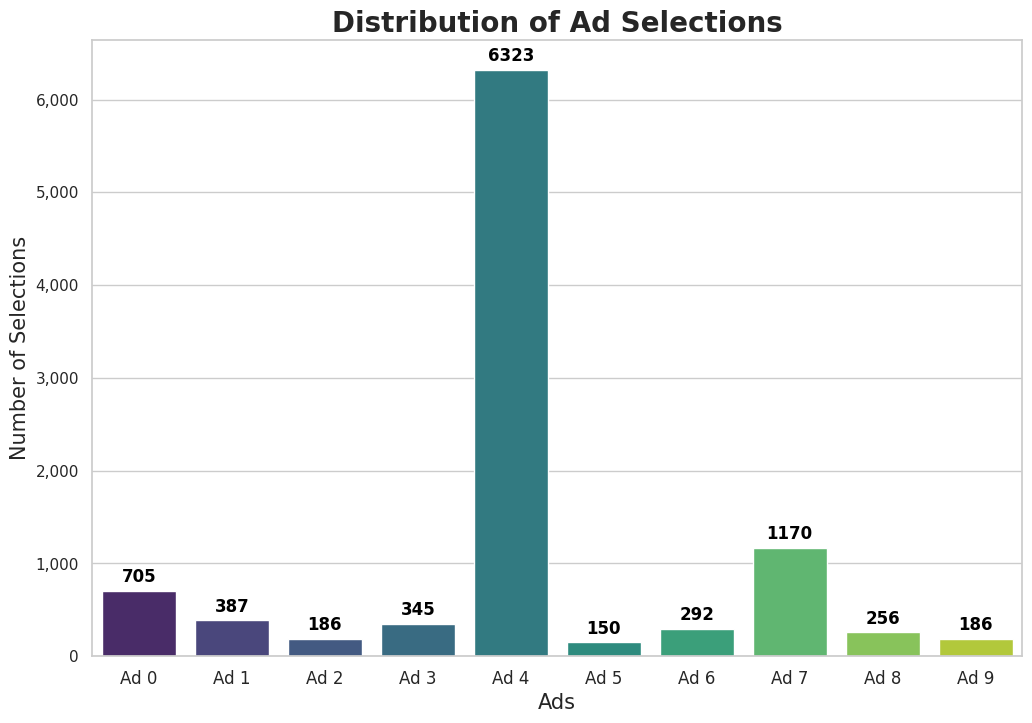

In [10]:
import seaborn as sns

# Setting up Seaborn style
sns.set(style="whitegrid")

# Visualizing the distribution of ad selections
plt.figure(figsize=(12, 8))  # Set the figure size
ax = sns.countplot(x=ads_selected, palette="viridis")  # Create a countplot to show the number of selections for each ad

# Setting the titles and labels
ax.set_title('Distribution of Ad Selections', fontsize=20, fontweight='bold')  # Title of the plot
ax.set_xlabel('Ads', fontsize=15)  # Label for the X-axis
ax.set_ylabel('Number of Selections', fontsize=15)  # Label for the Y-axis
ax.set_xticks(range(d))  # Set X-axis ticks to show ads (0-9)
ax.set_xticklabels(['Ad {}'.format(i) for i in range(d)], fontsize=12)  # Customize the X-axis labels

# Formatting the numbers on the Y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Annotating each bar with the count above it
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black', fontweight='bold')

# Display the plot
plt.show()